# Recurrent Neural Network (RNN)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
dataset_train = pd.read_csv('dataset/Stock_Price_Train.csv')

In [3]:
dataset_train.head(7)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"


In [4]:
train = dataset_train.loc[:,['Open']].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

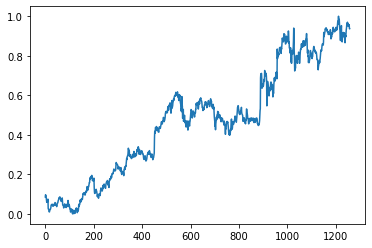

In [6]:
plt.plot(train_scaled)
plt.show()

In [7]:
x_train = []
y_train = []
timesteps = 50
for i in range(timesteps,len(train_scaled)):
    x_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])
x_train , y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [9]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [10]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

regressor = Sequential()
regressor.add(SimpleRNN(units=25,activation='tanh',return_sequences = True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1208/1208 [==============================] - 2s 2ms/step - loss: 0.3792
Epoch 2/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.2300
Epoch 3/100
1208/1208 [==============================] - 1s 994us/step - loss: 0.2048
Epoch 4/100
1208/1208 [==============================] - 1s 981us/step - loss: 0.1261
Epoch 5/100
1208/1208 [==============================] - 1s 982us/step - loss: 0.0914
Epoch 6/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0708
Epoch 7/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0606
Epoch 8/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0540
Epoch 9/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0430
Epoch 10/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0432
Epoch 11/100
1208/1208 [==============================] - 1s 1ms/step - loss: 0.0331
Epoch 12/100
1208/1208 [==============================] - 1s 1ms/ste

In [ ]:
dataset_test = pd.read_csv('dataset/Stock_Price_Test.csv')
dataset_test.head()

In [14]:
real_stock_price = dataset_test.loc[:, ["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  # min max scaler
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

In [29]:
model = Sequential()
model.add(LSTM(20, input_shape=(x_train.shape[1],1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
1208/1208 [==============================] - 16s 13ms/step - loss: 0.0057
Epoch 2/50
1208/1208 [==============================] - 15s 12ms/step - loss: 0.0011
Epoch 3/50
1208/1208 [==============================] - 14s 12ms/step - loss: 8.5819e-04
Epoch 4/50
1208/1208 [==============================] - 14s 12ms/step - loss: 7.4386e-04
Epoch 5/50
1208/1208 [==============================] - 16s 13ms/step - loss: 6.2595e-04
Epoch 6/50
1208/1208 [==============================] - 16s 13ms/step - loss: 4.7236e-04
Epoch 7/50
1208/1208 [==============================] - 16s 13ms/step - loss: 4.3720e-04
Epoch 8/50
1208/1208 [==============================] - 16s 13ms/step - loss: 4.0815e-04
Epoch 9/50
1208/1208 [==============================] - 16s 13ms/step - loss: 3.9473e-04
Epoch 10/50
1208/1208 [==============================] - 16s 13ms/step - loss: 3.5518e-04
Epoch 11/50
1208/1208 [==============================] - 15s 12ms/step - loss: 3.6716e-04
Epoch 12/50
1208/1208 [====

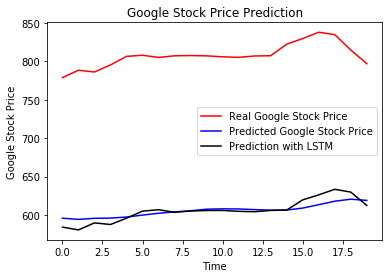

In [30]:
x_test = []
for i in range(timesteps, 70):
    x_test.append(inputs[i-timesteps:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predict_lstm = model.predict(x_test)
predict_lstm = scaler.inverse_transform(predict_lstm)
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.plot(predict_lstm,label='Prediction with LSTM', color='black')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# LSTM

In [31]:
data = pd.read_csv('dataset/international-airline-passengers.csv',skipfooter=5)
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


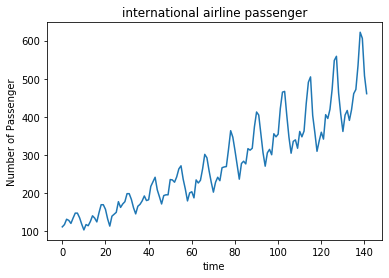

In [32]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

In [33]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

In [34]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [35]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 71, test size: 71 


In [36]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)  

In [37]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY)  

In [38]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [39]:
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
60/60 [==============================] - 0s 7ms/step - loss: 0.0189
Epoch 2/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 3/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 4/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 5/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 6/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 7/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 8/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 9/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 10/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 11/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 12/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 13/50
60/60 [==============================

In [42]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 16.53 RMSE
Test Score: 35.90 RMSE


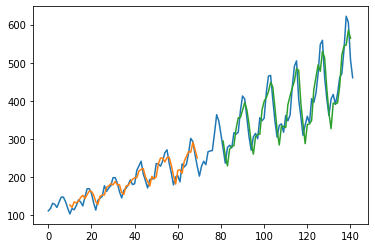

In [43]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp:] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()